# 9.5. Convolutional Neural Networks


### 1. Convolutional Layers

Convolutional Layers apply a sliding window that processes only a portion of the input at a time. They therefore represent spatial relationships between pixels.

A Convolutional Layer contains not just one set of neurons for processing a portion of the input. They contain many sets that are called feature maps or filters. During training, each feature map specializes in a particular feature of the input.

In an early Convolutional Layer these features might be dots, straight lines and angles. The following Convolutional Layers combine the features of the previous Layers so that they recognize more complex geometrical shapes, and ultimately entire objects.

### 2. MaxPooling

Max Pooling condenses the information in a CNN by selecting only the largest value in a sliding 2D window.

Pooling serves two main purposes:

- the data size gets smaller

- small variations (shifts by few pixels) get averaged out


### 3. Hyperparameters

Some hyperparameters of a convolutional layer are:

- The size of the sliding window (also called convolutional kernel)

- The stride or step width in which the sliding window moves

- The number of feature maps (filters)

- What kind of padding is applied on the borders of the input (e.g. filling it with zeroes to reach the corners).

Convolutional Layers with two dimensions are the most common, but 1D layers also exist (they are useful for audio processing).

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# loading mnist data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

#### Reshaping X and y
* For X, we need to add a 4th dimension using `np.expand_dims`
* For y, we need to factorize our labels using `to_categorical`

In [5]:
X_train_reshaped = np.expand_dims(X_train, axis=3)
X_test_reshaped = np.expand_dims(X_test, axis=3)
y_train_to_cat = to_categorical(y_train)
y_test_to_cat = to_categorical(y_test)

In [6]:
X_train_reshaped.shape

(60000, 28, 28, 1)

In [7]:
y_train_to_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

### Intentiating model

In [8]:
# this was our model before 
# model = Sequential([
#     Dense(60, input_shape=(784,)),
#     Activation('relu'),
#     Dense(20),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax')  
# ])

- replace the Dense layers by 2D Convolutional layers

- add MaxPooling layers after the convolutionals

- add a Flatten layer before the final dense/softmax layer

In [9]:
model = Sequential([
    Conv2D(filters=40,             # aka neurons/kernels/feature maps
           kernel_size=(3,3),      # The size of the sliding window (3,3) kernel has 9+1 parameters
           strides=(2,2),          # bigger > smaller output [default:(1,1) and use MaxPool aftwerwards]
                                   # The stride or step width in which the sliding window moves
           activation='relu',      # ReLu great first choice. ELU for optimization
           input_shape=(28,28,1)), # have to specify input shape in first layer <- shape of X
    Conv2D(filters=20, kernel_size=(3,3), strides=(2,2), activation='relu'),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Flatten(),
    Dense(10, activation='softmax')])

2022-03-06 16:37:11.473915: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-06 16:37:11.474109: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-06 16:37:11.476575: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 13, 13, 40)        400       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 20)          7220      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 2, 20)          0         
_________________________________________________________________
flatten (Flatten)            (None, 80)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                810       
Total params: 8,430
Trainable params: 8,430
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
callback = EarlyStopping(monitor='val_loss', patience=3)
h = model.fit(X_train_reshaped, y_train_to_cat, epochs=30, batch_size=500, callbacks=[callback], validation_split=0.2)

2022-03-06 16:37:11.893631: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-03-06 16:37:11.913042: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2699905000 Hz


Epoch 1/30
96/96 [==============================] - 13s 125ms/step - loss: 19.8019 - accuracy: 0.1756 - val_loss: 1.9141 - val_accuracy: 0.3433
Epoch 2/30
96/96 [==============================] - 13s 132ms/step - loss: 1.8449 - accuracy: 0.3709 - val_loss: 1.4669 - val_accuracy: 0.5094
Epoch 3/30
96/96 [==============================] - 13s 136ms/step - loss: 1.3964 - accuracy: 0.5380 - val_loss: 1.0429 - val_accuracy: 0.6600
Epoch 4/30
96/96 [==============================] - 13s 135ms/step - loss: 1.0054 - accuracy: 0.6813 - val_loss: 0.8012 - val_accuracy: 0.7473
Epoch 5/30
96/96 [==============================] - 13s 135ms/step - loss: 0.7772 - accuracy: 0.7584 - val_loss: 0.5944 - val_accuracy: 0.8177
Epoch 6/30
96/96 [==============================] - 13s 130ms/step - loss: 0.6228 - accuracy: 0.8120 - val_loss: 0.5275 - val_accuracy: 0.8358
Epoch 7/30
96/96 [==============================] - 13s 135ms/step - loss: 0.5267 - accuracy: 0.8389 - val_loss: 0.4795 - val_accuracy: 0.850

In [17]:
# test loss and score
model.evaluate(X_test_reshaped, y_test_to_cat, batch_size=500)

20/20 [==============================] - 0s 20ms/step - loss: 0.2373 - accuracy: 0.9268


[0.23733589053153992, 0.926800012588501]

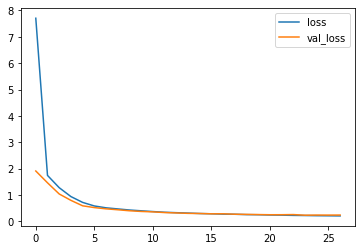

In [18]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss', 'val_loss'])

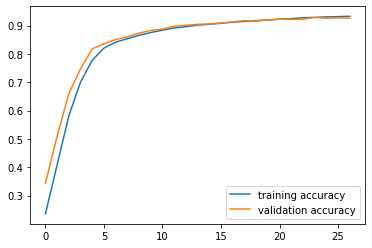

In [19]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['training accuracy', 'validation accuracy'])

In [20]:
# prediction on new data points
print(model.predict(X_test_reshaped[:10]))

[[4.6573298e-08 1.6553435e-05 2.7185028e-05 7.4155544e-08 5.6009312e-11
  8.1849284e-12 1.1299569e-14 9.9995601e-01 4.6446420e-09 8.1369407e-08]
 [5.7892002e-02 2.5813540e-02 7.8717321e-01 2.0397927e-03 3.7596710e-08
  4.5327659e-05 3.2596611e-03 2.0444555e-05 1.2373153e-01 2.4461044e-05]
 [4.1993302e-05 9.9886060e-01 1.6962999e-06 1.4221087e-08 9.5520180e-04
  4.8557331e-07 6.7656372e-05 2.3373595e-05 4.4975226e-05 4.0696705e-06]
 [9.9982077e-01 1.5049282e-07 4.2379622e-07 3.9632432e-06 3.0593252e-08
  3.3272665e-06 1.4508275e-06 2.9430732e-06 1.6660032e-04 2.8822194e-07]
 [1.6139559e-06 7.0518504e-06 5.8837054e-07 4.2296190e-08 9.9991822e-01
  5.5519408e-08 1.7145550e-05 4.9327577e-05 1.2686165e-07 5.7499078e-06]
 [1.6379911e-04 9.9934345e-01 1.3948211e-05 1.1144993e-08 1.8928248e-04
  1.3262544e-07 1.8329787e-05 8.0289545e-05 1.1072170e-04 8.0105914e-05]
 [1.0671059e-06 5.8525256e-05 5.3763473e-03 9.3958632e-05 9.6174157e-01
  8.2168281e-06 4.1118325e-04 2.8067418e-05 7.1098394e-04 